@ARTICLE{1989ApJ...345..245C,
       author = {{Cardelli}, Jason A. and {Clayton}, Geoffrey C. and {Mathis}, John S.},
        title = "{The Relationship between Infrared, Optical, and Ultraviolet Extinction}",
      journal = {\apj},
     keywords = {Infrared Spectra, Interstellar Extinction, Ultraviolet Spectra, Visible Spectrum, Computational Astrophysics, Interstellar Matter, Iue, Astrophysics, INTERSTELLAR: MATTER, ULTRAVIOLET: SPECTRA},
         year = 1989,
        month = oct,
       volume = {345},
        pages = {245},
          doi = {10.1086/167900},
       adsurl = {https://ui.adsabs.harvard.edu/abs/1989ApJ...345..245C},
      adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}

In [5]:
#########################
### Import Code Stuff ###
#########################

### Numpy and Scipy
import numpy as np

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

# ### Functions used in this code
# import age_functions as afunc

### Other
import warnings
warnings.filterwarnings('ignore')

### Progress Bar
from tqdm import tqdm_notebook

In [6]:
def cardelli(x,rv):
    '''
    Calculate A(Lambda)/A(V) from Cardelli et al. for 0.3 < lambda^-1 microns^-1 < 3.3
    
    Inputs:
    ------
        x: reciprocal wavelength in micron^-1
        rv: R_V value (standard R_V = 3.1)
        
    Output:
    ------
        al_av: A(Lambda)/A(V)
    
    ''' 
        
    if 0.3 <= x < 1.1:
        a = 0.574*(x**1.61)
        b_rv = (-0.527*(x**1.61))/rv
        al_av = a+b_rv
        return al_av
    
    elif 1.1 <= x <= 3.3:
        y = x - 1.82
        a = (1.+0.17699*y-0.50477*(y**2)-0.02427*(y**3)+0.72085*(y**4)+
             0.01979*(y**5)-0.77530*(y**6)+0.32999*(y**7))
        b_rv = (1.41338*y+2.28305*(y**2)+1.07233*(y**3)-5.38434*(y**4)-
                0.62251*(y**5)+5.30260*(y**6)-2.09002*(y**7))/rv
        al_av = a+b_rv
        return al_av
    
    else:
        print('0.3 <= x micron^-1 <3.3 not satisfied')
        return -9999.0
    
########

def cardelli_a(x):
    if 0.3 <= x < 1.1:
        a = 0.574*(x**1.61)
        return a
    
    elif 1.1 <= x <= 3.3:
        y = x - 1.82
        a = (1.+0.17699*y-0.50477*(y**2)-0.02427*(y**3)+0.72085*(y**4)+
             0.01979*(y**5)-0.77530*(y**6)+0.32999*(y**7))
        return a
    
def cardelli_b(x):
    if 0.3 <= x < 1.1:
        b = -0.527*(x**1.61)
        return b
    
    elif 1.1 <= x <= 3.3:
        y = x - 1.82
        b = (1.41338*y+2.28305*(y**2)+1.07233*(y**3)-5.38434*(y**4)-
                0.62251*(y**5)+5.30260*(y**6)-2.09002*(y**7))
        return b
    
def cardelli_alav(x,rv):
    alav = cardelli_a(x)+cardelli_b(x)/rv
    return alav

def cardelli_alebv(x,rv):
    alebv = cardelli_a(x)*rv+cardelli_b(x)/rv
    return alebv

def cardelli_e12ebv(xblue,xred,rv):
    a2a1rv = (cardelli_a(xblue) - cardelli_a(xred))*rv
    b2b1 = cardelli_b(xblue) - cardelli_b(xred)
    e12ebv = a2a1rv + b2b1
    return e12ebv
    
def cardelli_e12av(xblue,xred,rv):
    a2a1 = cardelli_a(xblue) - cardelli_a(xred)
    b2b1rv = (cardelli_b(xblue) - cardelli_b(xred))/rv
    e12av = a2a1 + b2b1rv
    return e12av

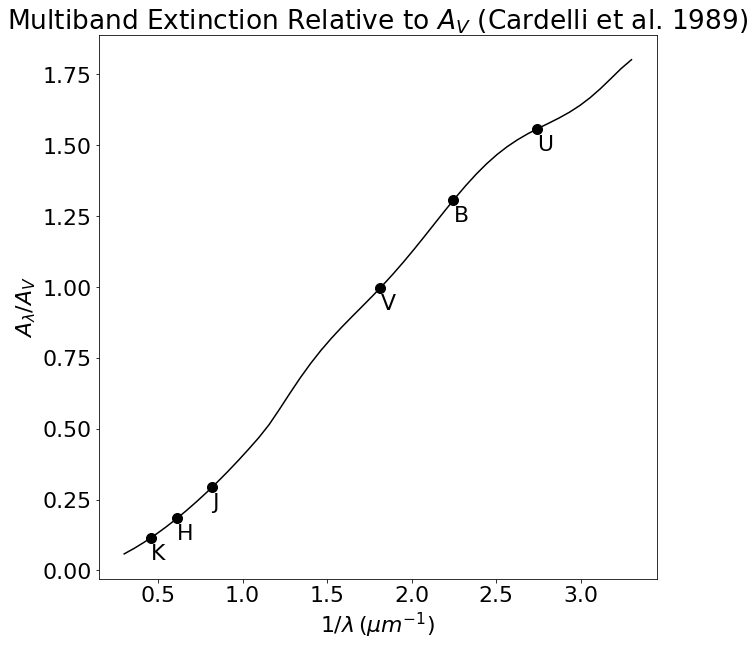

In [7]:
car_al_av = []
for i in np.linspace(0.3,3.3):
    car_al_av.append(cardelli_alav(i,3.1))

car_band = []
for j in 1/np.array([.365,.445,.551,1.220,1.630,2.190]):
    car_band.append(cardelli_alav(j,3.1))

plt.figure(figsize=[10,10])
plt.plot(np.linspace(0.3,3.3),car_al_av,c='k',label='Cardelli et al. 1989')
plt.scatter(1/np.array([.365,.445,.551,1.220,1.630,2.190]),car_band,c='k',s=100)

filters = ['U','B','V','J','H','K']
for i in range(len(filters)):
    plt.text(1/np.array([.365,.445,.551,1.220,1.630,2.190])[i],car_band[i]-0.075,filters[i])


plt.title(r'Multiband Extinction Relative to $A_V$ (Cardelli et al. 1989)')
plt.xlabel(r'$1/\lambda\,(\mu m^{-1})$')
plt.ylabel(r'$A_\lambda/A_V$')
plt.show()

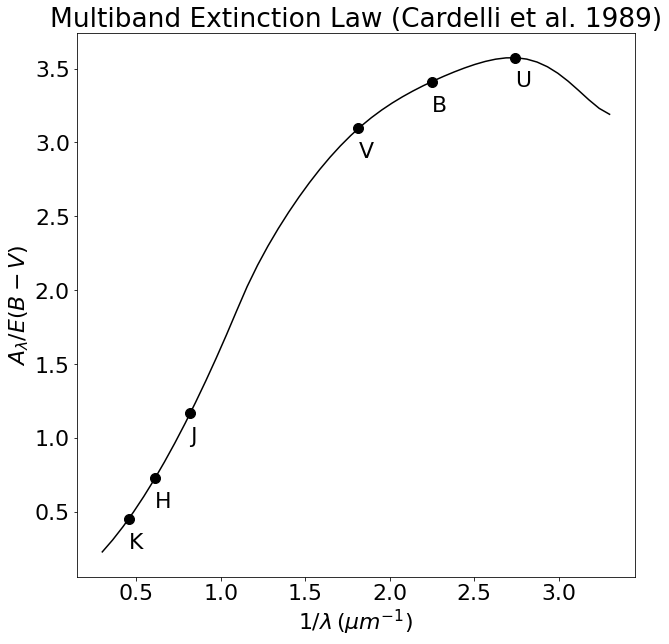

In [8]:
car_al_ebv = []
for i in np.linspace(0.3,3.3):
    car_al_ebv.append(cardelli_alebv(i,3.1))

car_band = []
for j in 1/np.array([.365,.445,.551,1.220,1.630,2.190]):
    car_band.append(cardelli_alebv(j,3.1))

plt.figure(figsize=[10,10])
plt.plot(np.linspace(0.3,3.3),car_al_ebv,c='k',label='Cardelli et al. 1989')
plt.scatter(1/np.array([.365,.445,.551,1.220,1.630,2.190]),car_band,c='k',s=100)

filters = ['U','B','V','J','H','K']
for i in range(len(filters)):
    plt.text(1/np.array([.365,.445,.551,1.220,1.630,2.190])[i],car_band[i]-0.2,filters[i])


plt.title(r'Multiband Extinction Law (Cardelli et al. 1989)')
plt.xlabel(r'$1/\lambda\,(\mu m^{-1})$')
plt.ylabel(r'$A_\lambda/E(B-V)$')
plt.show()